In [1]:
%matplotlib notebook
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# File to Load (Remember to change these)
city_file = "data/city_data.csv"
ride_file = "data/ride_data.csv"

In [4]:
# Read the City and Data
cities_df = pd.read_csv(city_file)
cities_df = cities_df.sort_values(['city'])
cities_df = cities_df.reset_index(drop=True)
cities_df.head()

,city,driver_count,type
0,Amandaburgh,12,Urban
1,Barajasview,26,Urban
2,Barronchester,11,Suburban
3,Bethanyland,22,Suburban
4,Bradshawfurt,7,Rural


In [5]:
# Read the Ride and Data
rides_df = pd.read_csv(ride_file)
rides_df = rides_df.sort_values(['city'])
rides_df = rides_df.reset_index(drop=True)
rides_df.head()

,city,date,fare,ride_id
0,Amandaburgh,2018-04-24 08:02:27,14.55,7836117055007
1,Amandaburgh,2018-02-10 20:42:46,36.17,6455620849753
2,Amandaburgh,2018-02-24 23:10:49,43.66,6573820412437
3,Amandaburgh,2018-03-05 02:15:38,26.28,906850928986
4,Amandaburgh,2018-03-07 02:26:33,18.76,3419454549176


In [6]:
# Verify the cities in the rides_df and cities_df are consistant
# Every city has ride/rides, so can use inner join
cities_from_cities = sorted(cities_df.loc[:, "city"])
cities_from_rides = sorted(rides_df["city"].unique())
cities_from_cities == cities_from_rides

True

In [7]:
# Combine the data into a single dataset
cities_rides_df = pd.merge(rides_df, cities_df, on="city")
cities_rides_df.head()

,city,date,fare,ride_id,driver_count,type
0,Amandaburgh,2018-04-24 08:02:27,14.55,7836117055007,12,Urban
1,Amandaburgh,2018-02-10 20:42:46,36.17,6455620849753,12,Urban
2,Amandaburgh,2018-02-24 23:10:49,43.66,6573820412437,12,Urban
3,Amandaburgh,2018-03-05 02:15:38,26.28,906850928986,12,Urban
4,Amandaburgh,2018-03-07 02:26:33,18.76,3419454549176,12,Urban


## Bubble Plot of Ride Sharing Data

In [8]:
# Get the city types
city_types = sorted(cities_df["type"].unique())
city_types_new = [city_types[0], city_types[2], city_types[1]]
city_types, city_types_new

(['Rural', 'Suburban', 'Urban'], ['Rural', 'Urban', 'Suburban'])

In [9]:
# Find x limit

# Group by city type and city
cities_rides_grouped = cities_rides_df.groupby(['type', 'city'])

# Find the ride counts for each city type in each city
number_of_rides = cities_rides_grouped['fare'].count()

# Find the min and max ride count
number_of_rides_min = int(np.floor(number_of_rides.min()))
number_of_rides_max = int(np.ceil(number_of_rides.max()))

x_min = number_of_rides_min - 3
x_max = number_of_rides_max + 2
x_min, x_max

(0, 41)

In [10]:
# Find y limit

# Find the ride counts for each city type in each city
average_fares = cities_rides_grouped['fare'].mean()

# Find the min and max average fares
average_fares_min = int(np.floor(average_fares.min()))
average_fares_max = int(np.ceil(average_fares.max()))

y_min = average_fares_min - 1
y_max = average_fares_max + 1
y_min, y_max

(19, 45)

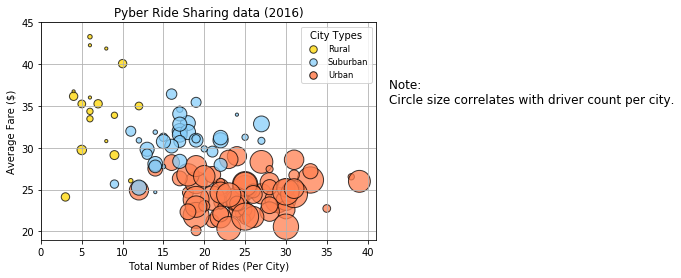

In [11]:
# Obtain the ride counts and average fair for each city type
rides_summary = {}

# Set x limit, y limit
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Set title, xlabel, y label, and grid
plt.title("Pyber Ride Sharing data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

# Plot the scatter plot
for city_type in city_types_new:
    if city_type == "Rural":
        color = "Gold"
    elif city_type == 'Suburban':
        color = 'lightskyblue'
    else:
        color = 'coral'
        
    rides = cities_rides_df.loc[cities_rides_df['type'] == city_type]
    rides_grouped_by_city = rides.groupby('city')
    
    number_of_rides_by_city = rides_grouped_by_city['fare'].count()
    average_fare_by_city = rides_grouped_by_city["fare"].mean()
    drivers_count_by_city = (rides_grouped_by_city['driver_count'].mean()) * 10
    
    # Plot the chart
    plt.scatter(number_of_rides_by_city, average_fare_by_city, marker="o", facecolors=color, edgecolors="black",
            s=drivers_count_by_city, alpha=0.75, label=type)

# Create dummy Line2D objects for legend
h1 = plt.scatter([0], [0], marker="o", facecolors="gold", edgecolors="black",
            s=25, alpha=0.75, label="Rural")
h2 = plt.scatter([0], [0], marker="o", facecolors="lightskyblue", edgecolors="black",
            s=25, alpha=0.75, label="Suburban")
h3 = plt.scatter([0], [0], marker="o", facecolors="coral", edgecolors="black",
            s=25, alpha=0.85, label="Urban")

# Set legend
legend = plt.legend(handles=[h1, h2, h3], markerscale=1.5, title="City Types", loc="best", fontsize='small', fancybox=True)

# Incorporate a text label regarding circle size
plt.figtext(0.93, 0.60,"Note: \nCircle size correlates with driver count per city.", wrap=True,
            horizontalalignment='left', fontsize=12)

plt.savefig("pyber.png")
plt.show()   

## Total Fares by City Type

## Total Rides by City Type

## Total Drivers by City Type

In [12]:
# Get rides group by type
rides_by_city_type = cities_rides_df.groupby('type')

In [13]:
# Get drivers group by type
drivers_by_city_type = cities_df.groupby('type')

In [14]:
# Setup labels, colors, and explode for the charts
labels = city_types
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1)

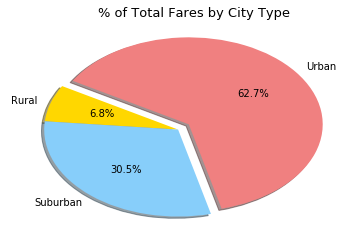

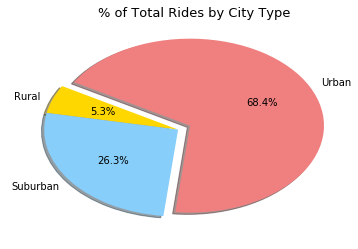

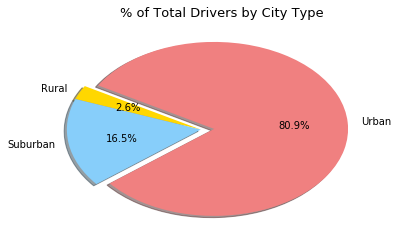

In [15]:
# Use for loop to plot the pie charts
topics = ['Fares', 'Rides', 'Drivers']

for topic in topics:
    if topic == 'Drivers':
        # Calculate total Drivers by city type
        data = drivers_by_city_type['driver_count'].sum()
    elif topic == 'Fares':
        # Calculate total fares by city type
        data = rides_by_city_type['fare'].sum()
    elif topic == 'Rides':
        # Calculate Rides per city type
        data = rides_by_city_type['ride_id'].count()
    title = "% of Total " + topic + " by City Type"
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    # Plot the pie chart
    ax.pie(data, labels=labels, colors=colors, startangle=150, autopct="%1.1f%%", shadow=True, explode=explode)
    
    # Title for the chart
    ax.text(-0.6, 1.3, title, wrap=True, horizontalalignment='left', fontsize=13)
    
    # Save to file
    filename = topic.lower() + ".png"
    plt.savefig(filename)
    plt.show()
   